In [11]:
from Utils import PlotUtlis, create_folder, mm2inch, set_mpl_defaults, convert_to_env_list_detail, get_significance_stars

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import mannwhitneyu, levene, kruskal
from matplotlib.colors import ListedColormap
import feather
import cv2
import matplotlib.lines as mlines
import numpy.ma as ma
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

set_mpl_defaults()

In [2]:
run_id = 'e52c8ac9a3e24c75ac871f63bbdea060'
exp_id = '115656750127464383'
niche_rst_size = 100

In [3]:
PU = PlotUtlis(run_id = run_id, exp_id = exp_id, niche_rst_size = niche_rst_size)

In [4]:
create_folder(PU.plot_path_suppl)

### Fig S1

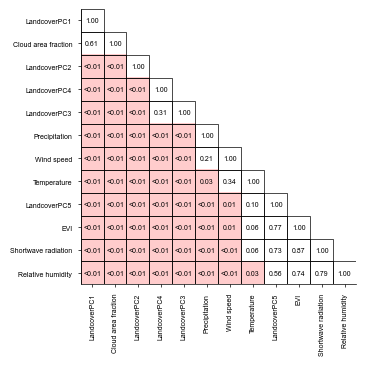

In [6]:
df_attention_order = PU.df_attention.copy()
df_attention_order.columns = convert_to_env_list_detail(df_attention_order.columns)
df_attention_order = df_attention_order.sort_values(by = 'LandcoverPC1', ascending = True)
factor_order = df_attention_order.mean().sort_values(ascending = False).index
df_attention_order = df_attention_order[factor_order]
sorted_env_factors = df_attention_order.columns

p_value_matrix_sorted = pd.DataFrame(np.ones((len(sorted_env_factors), len(sorted_env_factors))), 
                                     index=sorted_env_factors, columns=sorted_env_factors)

for i, factor1 in enumerate(sorted_env_factors):
    for j, factor2 in enumerate(sorted_env_factors):
        if i == j:
            p_value_matrix_sorted.loc[factor1, factor2] = 1.0
        else:
            _, p_value = mannwhitneyu(df_attention_order[factor1], df_attention_order[factor2], alternative='two-sided')
            p_value_matrix_sorted.loc[factor1, factor2] = p_value
            p_value_matrix_sorted.loc[factor2, factor1] = p_value 

p_value_array = p_value_matrix_sorted.to_numpy()


threshold = 0.05
custom_cmap = ListedColormap(["red", "white"])

color_mask = np.where(p_value_array < threshold, 0, 1)
upper_triangle_mask = np.triu(np.ones_like(p_value_array, dtype=bool), k=1)
color_mask = np.where(upper_triangle_mask, np.nan, color_mask)

fig, ax = plt.subplots(figsize=mm2inch(90, 90), constrained_layout = True)

ax.imshow(color_mask, cmap=custom_cmap, interpolation='nearest', alpha=0.2)
ax.set_xticks(np.arange(len(sorted_env_factors)))
ax.set_yticks(np.arange(len(sorted_env_factors)))
ax.set_xticklabels(sorted_env_factors, rotation=90)
ax.set_yticklabels(sorted_env_factors)

for i in range(len(sorted_env_factors)):
    for j in range(len(sorted_env_factors)):
        if i >= j:
            rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor='black', linewidth=0.5)
            ax.add_patch(rect)

for i in range(len(sorted_env_factors)):
    for j in range(len(sorted_env_factors)):
        if i >= j:
            p_val = p_value_matrix_sorted.iloc[i, j]
            if round(p_val, 2) < 0.01:
                text = "<0.01"
            else:
                text = f"{round(p_val, 2):.2f}"
            ax.text(j, i, text, ha='center', va='center', color='black', fontsize=5,)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plot_output = os.path.join(PU.plot_path_suppl, 'FigS1_median.pdf')
plt.savefig(plot_output, transparent = True, dpi = 500)
plt.show()

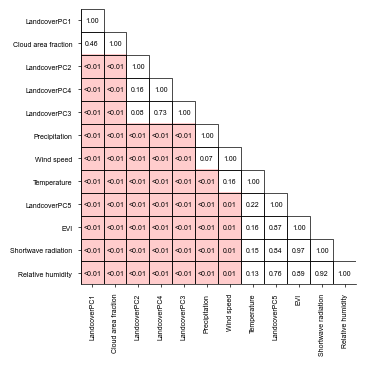

In [7]:
p_value_matrix_sorted = pd.DataFrame(np.ones((len(sorted_env_factors), len(sorted_env_factors))), 
                                     index=sorted_env_factors, columns=sorted_env_factors)

for i, factor1 in enumerate(sorted_env_factors):
    for j, factor2 in enumerate(sorted_env_factors):
        if i == j:
            p_value_matrix_sorted.loc[factor1, factor2] = 1.0
        else:
            _, p_value = levene(df_attention_order[factor1], df_attention_order[factor2])
            p_value_matrix_sorted.loc[factor1, factor2] = p_value
            p_value_matrix_sorted.loc[factor2, factor1] = p_value

p_value_array = p_value_matrix_sorted.to_numpy()

threshold = 0.05
custom_cmap = ListedColormap(["red", "white"])

color_mask = np.where(p_value_array < threshold, 0, 1)
upper_triangle_mask = np.triu(np.ones_like(p_value_array, dtype=bool), k=1)
color_mask = np.where(upper_triangle_mask, np.nan, color_mask)

fig, ax = plt.subplots(figsize=mm2inch(90, 90), constrained_layout=True)

ax.imshow(color_mask, cmap=custom_cmap, interpolation='nearest', alpha=0.2)
ax.set_xticks(np.arange(len(sorted_env_factors)))
ax.set_yticks(np.arange(len(sorted_env_factors)))
ax.set_xticklabels(sorted_env_factors, rotation=90)
ax.set_yticklabels(sorted_env_factors)

for i in range(len(sorted_env_factors)):
    for j in range(len(sorted_env_factors)):
        if i >= j:
            rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor='black', linewidth=0.5)
            ax.add_patch(rect)

for i in range(len(sorted_env_factors)):
    for j in range(len(sorted_env_factors)):
        if i >= j:
            p_val = p_value_matrix_sorted.iloc[i, j]
            if round(p_val, 2) < 0.01:
                text = "<0.01"
            else:
                text = f"{round(p_val, 2):.2f}"
            ax.text(j, i, text, ha='center', va='center', color='black', fontsize=5,)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plot_output = os.path.join(PU.plot_path_suppl, 'FigS1_variance.pdf')
plt.savefig(plot_output, transparent=True, dpi=500)
plt.show()

### Fig S2

### Cloud area fraction

In [10]:
env_plot = 'clt'
env_min = PU.df_env_pca[sorted([key for key in PU.df_env_pca.keys() if key.startswith(env_plot)])].values.flatten().min()
env_max = PU.df_env_pca[sorted([key for key in PU.df_env_pca.keys() if key.startswith(env_plot)])].values.flatten().max()

# Prepare storage for environmental values per cluster
cluster_env_values = {1: [], 2: [], 3: []}

for cluster in [1, 2, 3]:
    species_list_cluster = np.array(PU.species_list_predict)[np.array(PU.cluster_labels) == cluster].tolist()

    for species in species_list_cluster:
        df_species = feather.read_dataframe(PU.plot_path_df_species.replace('[SPECIES]', species))

        occ_value = df_species[sorted([key for key in df_species.keys() if key.startswith('occ')])].values.flatten()
        env_value = PU.df_env_pca[sorted([key for key in PU.df_env_pca.keys() if key.startswith(env_plot)])].values.flatten()

        mask = ~np.isnan(occ_value) & ~np.isnan(env_value)
        occ_value = occ_value[mask]
        env_value = env_value[mask]

        i_threshold = np.where(occ_value == 1)[0]

        env_value = env_value[i_threshold]
        cluster_env_values[cluster].extend(env_value)

# 執行 Kruskal-Wallis 檢定
pairwise_results = {
    'Cluster 1 vs Cluster 2': kruskal(cluster_env_values[1], cluster_env_values[2]),
    'Cluster 1 vs Cluster 3': kruskal(cluster_env_values[1], cluster_env_values[3]),
    'Cluster 2 vs Cluster 3': kruskal(cluster_env_values[2], cluster_env_values[3]),
}

# 繪製 violin plot
fig, ax = plt.subplots(figsize=mm2inch(50, 50), constrained_layout=True)
violin = ax.violinplot([cluster_env_values[1], cluster_env_values[2], cluster_env_values[3]], 
                        showmeans=False, showmedians=True, showextrema=True, widths=0.6, quantiles = [[0.25, 0.75], [0.25, 0.75], [0.25, 0.75]])

# 設定 violin plot 顏色
for i, body in enumerate(violin['bodies']):
    body.set_facecolor(PU.color_list[i])  # 設定每個 violin 的顏色
    body.set_alpha(0.7)  # 調整透明度
    body.set_edgecolor('black')
    body.set_linewidth(0.5)
for c_element in [violin['cmaxes'], violin['cmins'], violin['cbars'], violin['cmedians'], violin['cquantiles']]:
    c_element.set_linewidth(0.5)
    c_element.set_color('black')

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_ylabel('Cloud area fraction')

# 計算標註位置
y_max = max([max(cluster_env_values[i]) for i in [1, 2, 3]])  # 取得最大 y 值
y_min = min([min(cluster_env_values[i]) for i in [1, 2, 3]])  # 取得最小 y 值
y_step = (y_max - y_min) * 0.07  # 每條線間的間距

# 兩兩組合的比較位置
positions = [(1, 2), (1, 3), (2, 3)]
y_levels = [y_max + 0.5 * y_step, y_max + 1.5 * y_step, y_max + 2.5 * y_step]  # 每條線的 y 位置

# 加入顯著性標註與橫線
for i, ((pos1, pos2), y_pos) in enumerate(zip(positions, y_levels)):
    p_value = pairwise_results[list(pairwise_results.keys())[i]][1]  # 取得 p-value
    significance = get_significance_stars(p_value)  # 取得對應的顯著性標註

    x1, x2 = pos1, pos2
    ax.plot([x1, x2], [y_pos, y_pos], color='black', linewidth=0.5)  # 畫 "匚" 型橫線
    ax.text((x1 + x2) / 2, y_pos, significance, ha='center', va='center', fontsize=5)

# 儲存圖表
plot_output = os.path.join(PU.plot_path_suppl, f'FigS2_{env_plot}_violin.pdf')
plt.savefig(plot_output, dpi=500, transparent=True)
plt.show()

# 返回檢定結果
print(pairwise_results)

### landcoverPC1

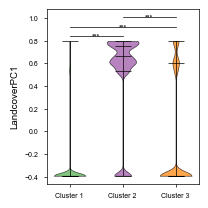

{'Cluster 1 vs Cluster 2': KruskalResult(statistic=57696.40325347088, pvalue=0.0), 'Cluster 1 vs Cluster 3': KruskalResult(statistic=11283.040652407186, pvalue=0.0), 'Cluster 2 vs Cluster 3': KruskalResult(statistic=158096.77800426504, pvalue=0.0)}


In [19]:
env_plot = 'landcover_PC00'
env_min = PU.df_env_pca[sorted([key for key in PU.df_env_pca.keys() if key.startswith(env_plot)])].values.flatten().min()
env_max = PU.df_env_pca[sorted([key for key in PU.df_env_pca.keys() if key.startswith(env_plot)])].values.flatten().max()

# Prepare storage for environmental values per cluster
cluster_env_values = {1: [], 2: [], 3: []}

for cluster in [1, 2, 3]:
    species_list_cluster = np.array(PU.species_list_predict)[np.array(PU.cluster_labels) == cluster].tolist()

    for species in species_list_cluster:
        df_species = feather.read_dataframe(PU.plot_path_df_species.replace('[SPECIES]', species))

        occ_value = df_species[sorted([key for key in df_species.keys() if key.startswith('occ')])].values.flatten()
        env_value = PU.df_env_pca[sorted([key for key in PU.df_env_pca.keys() if key.startswith(env_plot)])].values.flatten()

        mask = ~np.isnan(occ_value) & ~np.isnan(env_value)
        occ_value = occ_value[mask]
        env_value = env_value[mask]

        i_threshold = np.where(occ_value == 1)[0]

        env_value = env_value[i_threshold]
        cluster_env_values[cluster].extend(env_value)

# 執行 Kruskal-Wallis 檢定
pairwise_results = {
    'Cluster 1 vs Cluster 2': kruskal(cluster_env_values[1], cluster_env_values[2]),
    'Cluster 1 vs Cluster 3': kruskal(cluster_env_values[1], cluster_env_values[3]),
    'Cluster 2 vs Cluster 3': kruskal(cluster_env_values[2], cluster_env_values[3]),
}

# 繪製 violin plot
fig, ax = plt.subplots(figsize=mm2inch(50, 50), constrained_layout=True)
violin = ax.violinplot([cluster_env_values[1], cluster_env_values[2], cluster_env_values[3]], 
                        showmeans=False, showmedians=True, showextrema=True, widths=0.6, quantiles = [[0.25, 0.75], [0.25, 0.75], [0.25, 0.75]])

# 設定 violin plot 顏色
for i, body in enumerate(violin['bodies']):
    body.set_facecolor(PU.color_list[i])  # 設定每個 violin 的顏色
    body.set_alpha(0.7)  # 調整透明度
    body.set_edgecolor('black')
    body.set_linewidth(0.5)
for c_element in [violin['cmaxes'], violin['cmins'], violin['cbars'], violin['cmedians'], violin['cquantiles']]:
    c_element.set_linewidth(0.5)
    c_element.set_color('black')

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_ylabel('LandcoverPC1')

# 計算標註位置
y_max = max([max(cluster_env_values[i]) for i in [1, 2, 3]])  # 取得最大 y 值
y_min = min([min(cluster_env_values[i]) for i in [1, 2, 3]])  # 取得最小 y 值
y_step = (y_max - y_min) * 0.07  # 每條線間的間距

# 兩兩組合的比較位置
positions = [(1, 2), (1, 3), (2, 3)]
y_levels = [y_max + 0.5 * y_step, y_max + 1.5 * y_step, y_max + 2.5 * y_step]  # 每條線的 y 位置

# 加入顯著性標註與橫線
for i, ((pos1, pos2), y_pos) in enumerate(zip(positions, y_levels)):
    p_value = pairwise_results[list(pairwise_results.keys())[i]][1]  # 取得 p-value
    significance = get_significance_stars(p_value)  # 取得對應的顯著性標註

    x1, x2 = pos1, pos2
    ax.plot([x1, x2], [y_pos, y_pos], color='black', linewidth=0.5)  # 畫 "匚" 型橫線
    ax.text((x1 + x2) / 2, y_pos, significance, ha='center', va='center', fontsize=5)

# 儲存圖表
plot_output = os.path.join(PU.plot_path_suppl, f'FigS2_{env_plot}_violin.pdf')
plt.savefig(plot_output, dpi=500, transparent=True)
plt.show()

# 返回檢定結果
print(pairwise_results)

### hurs

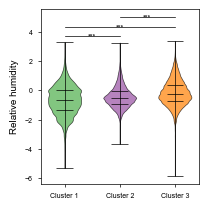

{'Cluster 1 vs Cluster 2': KruskalResult(statistic=1166.2369510830388, pvalue=1.3275131890471264e-255), 'Cluster 1 vs Cluster 3': KruskalResult(statistic=6251.49651775398, pvalue=0.0), 'Cluster 2 vs Cluster 3': KruskalResult(statistic=20353.221149592235, pvalue=0.0)}


In [20]:
env_plot = 'hurs'
env_min = PU.df_env_pca[sorted([key for key in PU.df_env_pca.keys() if key.startswith(env_plot)])].values.flatten().min()
env_max = PU.df_env_pca[sorted([key for key in PU.df_env_pca.keys() if key.startswith(env_plot)])].values.flatten().max()

# Prepare storage for environmental values per cluster
cluster_env_values = {1: [], 2: [], 3: []}

for cluster in [1, 2, 3]:
    species_list_cluster = np.array(PU.species_list_predict)[np.array(PU.cluster_labels) == cluster].tolist()

    for species in species_list_cluster:
        df_species = feather.read_dataframe(PU.plot_path_df_species.replace('[SPECIES]', species))

        occ_value = df_species[sorted([key for key in df_species.keys() if key.startswith('occ')])].values.flatten()
        env_value = PU.df_env_pca[sorted([key for key in PU.df_env_pca.keys() if key.startswith(env_plot)])].values.flatten()

        mask = ~np.isnan(occ_value) & ~np.isnan(env_value)
        occ_value = occ_value[mask]
        env_value = env_value[mask]

        i_threshold = np.where(occ_value == 1)[0]

        env_value = env_value[i_threshold]
        cluster_env_values[cluster].extend(env_value)

# 執行 Kruskal-Wallis 檢定
pairwise_results = {
    'Cluster 1 vs Cluster 2': kruskal(cluster_env_values[1], cluster_env_values[2]),
    'Cluster 1 vs Cluster 3': kruskal(cluster_env_values[1], cluster_env_values[3]),
    'Cluster 2 vs Cluster 3': kruskal(cluster_env_values[2], cluster_env_values[3]),
}

# 繪製 violin plot
fig, ax = plt.subplots(figsize=mm2inch(50, 50), constrained_layout=True)
violin = ax.violinplot([cluster_env_values[1], cluster_env_values[2], cluster_env_values[3]], 
                        showmeans=False, showmedians=True, showextrema=True, widths=0.6, quantiles = [[0.25, 0.75], [0.25, 0.75], [0.25, 0.75]])

# 設定 violin plot 顏色
for i, body in enumerate(violin['bodies']):
    body.set_facecolor(PU.color_list[i])  # 設定每個 violin 的顏色
    body.set_alpha(0.7)  # 調整透明度
    body.set_edgecolor('black')
    body.set_linewidth(0.5)
for c_element in [violin['cmaxes'], violin['cmins'], violin['cbars'], violin['cmedians'], violin['cquantiles']]:
    c_element.set_linewidth(0.5)
    c_element.set_color('black')

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Cluster 1', 'Cluster 2', 'Cluster 3'])
ax.set_ylabel('Relative humidity')

# 計算標註位置
y_max = max([max(cluster_env_values[i]) for i in [1, 2, 3]])  # 取得最大 y 值
y_min = min([min(cluster_env_values[i]) for i in [1, 2, 3]])  # 取得最小 y 值
y_step = (y_max - y_min) * 0.07  # 每條線間的間距

# 兩兩組合的比較位置
positions = [(1, 2), (1, 3), (2, 3)]
y_levels = [y_max + 0.5 * y_step, y_max + 1.5 * y_step, y_max + 2.5 * y_step]  # 每條線的 y 位置

# 加入顯著性標註與橫線
for i, ((pos1, pos2), y_pos) in enumerate(zip(positions, y_levels)):
    p_value = pairwise_results[list(pairwise_results.keys())[i]][1]  # 取得 p-value
    significance = get_significance_stars(p_value)  # 取得對應的顯著性標註

    x1, x2 = pos1, pos2
    ax.plot([x1, x2], [y_pos, y_pos], color='black', linewidth=0.5)  # 畫 "匚" 型橫線
    ax.text((x1 + x2) / 2, y_pos, significance, ha='center', va='center', fontsize=5)

# 儲存圖表
plot_output = os.path.join(PU.plot_path_suppl, f'FigS2_{env_plot}_violin.pdf')
plt.savefig(plot_output, dpi=500, transparent=True)
plt.show()

# 返回檢定結果
print(pairwise_results)

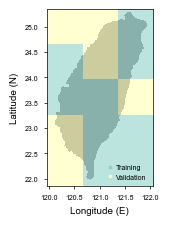

In [27]:
partition_file='./workspace/partition.txt'
train_val_partitions = np.loadtxt(partition_file, delimiter=',')
train_val_mask = cv2.resize(train_val_partitions, (PU.DeepSDM_conf.spatial_conf_tmp['num_of_grid_x'] * PU.DeepSDM_conf.spatial_conf_tmp['grid_size'], 
                                                   PU.DeepSDM_conf.spatial_conf_tmp['num_of_grid_y'] * PU.DeepSDM_conf.spatial_conf_tmp['grid_size']), interpolation = cv2.INTER_NEAREST)

fig, ax = plt.subplots(figsize = mm2inch(40, 100), constrained_layout = True)
ax.imshow(np.where(PU.extent_binary == 0, np.nan, PU.extent_binary), extent = PU.extent_binary_extent, cmap = ListedColormap('grey'))
ax.imshow(train_val_mask, alpha = 0.6, cmap = ListedColormap(['#ffffb3', '#8dd3c7']), extent = PU.extent_binary_extent)
ax.set_xlabel('Longitude (E)')
ax.set_ylabel('Latitude (N)')

validation_proxy = mlines.Line2D([], [], color='#ffffb3', marker='s', linestyle='None', markersize=2, label='Validation')
training_proxy = mlines.Line2D([], [], color='#8dd3c7', marker='s', linestyle='None', markersize=2, label='Training')

ax.legend(handles=[training_proxy, validation_proxy], loc='lower right', handletextpad=-0.2)
plot_output = os.path.join(PU.plot_path_suppl, 'Fig_S3_trainval_split.pdf')
# plt.savefig(plot_output, dpi = 500, transparent = True)
plt.show()

### Fig S4

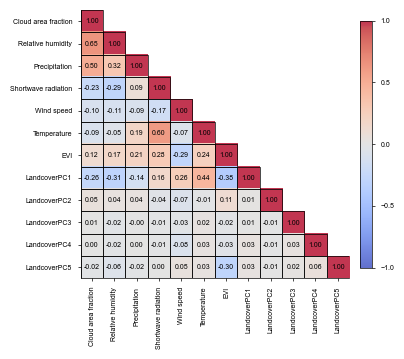

In [9]:
# 轉換數據為 NumPy 矩陣
correlation_array = PU.df_env_corr.to_numpy()
sorted_env_factors = PU.df_env_corr.columns

# 建立遮罩：右上三角 (不含對角線) 為 True
mask = np.triu(np.ones_like(correlation_array, dtype=bool), k=1)
# 將 correlation_array 轉為 masked array，遮罩右上三角
masked_corr = ma.array(correlation_array, mask=mask)

# 複製 colormap 並設定遮罩區域為白色
cmap = plt.cm.coolwarm.copy()
cmap.set_bad(color='white')

# 創建圖表，使用 constrained_layout=True 以符合 B 的版面配置
fig, ax = plt.subplots(figsize=mm2inch(100, 100), constrained_layout=True)

# 顯示矩陣，使用 masked array 與自訂 colormap
cax = ax.imshow(masked_corr, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1, alpha = 0.8)

# 加入 colorbar 作為 legend，調整 fraction 與 pad 參數以取得適合的尺寸
cb = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cb.ax.tick_params()  # 可調整 colorbar 的字體大小
cb.ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
# 設置坐標標籤
ax.set_xticks(np.arange(len(sorted_env_factors)))
ax.set_yticks(np.arange(len(sorted_env_factors)))
ax.set_xticklabels(convert_to_env_list_detail(sorted_env_factors), rotation=90)
ax.set_yticklabels(convert_to_env_list_detail(sorted_env_factors))

# 僅在左下三角（包含對角線）中標記數值並繪製框線
for i in range(len(sorted_env_factors)):
    for j in range(len(sorted_env_factors)):
        if i >= j:  # 僅針對左下三角和對角線部分
            # 繪製格線框線
            rect = plt.Rectangle((j - 0.5, i - 0.5), 1, 1,
                                 fill=False, edgecolor='black', linewidth=0.5)
            ax.add_patch(rect)
            # 在框內標記數值，保留兩位小數
            value = correlation_array[i, j]
            ax.text(j, i, f"{value:.2f}", ha='center', va='center',
                    color='black', fontsize=5)

# 隱藏上、右邊框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plot_output = os.path.join(PU.plot_path_suppl, 'FigS4_env_correlation.pdf')
# plt.savefig(plot_output, dpi=500, transparent=True)
plt.show()

### Fig S5

In [10]:
nichespace_deepsdm_all, nichespace_deepsdm_all_nonflatten = PU.get_deepsdm_nichespace(suffix = 'max')

Evaluating 20 clusters...

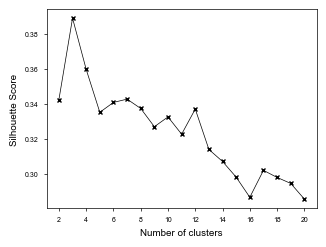

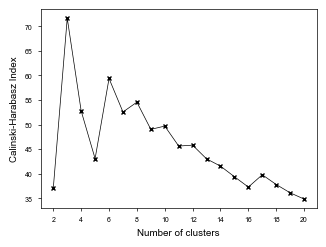

In [13]:
# Define the range of clusters to evaluate
K = range(2, 21)

# Initialize lists to store the scores for each number of clusters
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Evaluate clustering for each number of clusters using AgglomerativeClustering
for k in K:
    print(f"\rEvaluating {k} clusters...", end = '')
    
    # AgglomerativeClustering
    clustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='average')
    labels = clustering.fit_predict(nichespace_deepsdm_all)
    
    # Calculate Silhouette Score
    silhouette_scores.append(silhouette_score(nichespace_deepsdm_all, labels))
        
    # Calculate Calinski-Harabasz Index
    calinski_harabasz_scores.append(calinski_harabasz_score(nichespace_deepsdm_all, labels))

line_style = '-'
marker_style = 'x'
line_color = 'k'

fig, ax = plt.subplots(figsize=mm2inch(80, 60), constrained_layout=True)
ax.plot(K, silhouette_scores, linestyle=line_style, marker=marker_style, color=line_color, )
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plot_output = os.path.join(PU.plot_path_suppl, 'FigS5_silhouette_score.pdf')
# plt.savefig(plot_output, dpi=500, transparent=True)
plt.show()

fig, ax = plt.subplots(figsize=mm2inch(80, 60), constrained_layout=True)
ax.plot(K, calinski_harabasz_scores, linestyle=line_style, marker=marker_style, color=line_color, )
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Calinski-Harabasz Index')
ax.set_xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plot_output = os.path.join(PU.plot_path_suppl, 'FigS5_calinski_harabasz_scores.pdf')
# plt.savefig(plot_output, dpi=500, transparent=True)
plt.show()